# Sensitivity analysis of radiation routine

In [1]:
# The purpose of this notebook is to verify the SHyFT implementation of Radiation routine.
# ref.: Allen R.G., Trezza R., Tasumi, Masahiro. Analytical integrated functions for daily solar radiation on slopes.
# // Agricultural and Forest Meteorology 139 (2006) 55–73

## First we will import all necessary content

In [2]:
import os
import sys
import numpy as np
import math
from matplotlib import pyplot as plt
from datetime import datetime
import shyft.hydrology as api
from shyft.time_series import (Calendar,deltahours,UtcPeriod,TimeSeries,TimeAxis,DoubleVector,point_interpretation_policy)

In [3]:
# These are some helper functions

In [4]:
from radiation_runner import RadiationRunner
runner = RadiationRunner()

def plot_results(xvar, yvar, fig1, ax1, ymax, xname, yname, plotname, lab, col, labloc, ymin=0.0):
    """ Plots things"""
    ax1.plot(xvar, yvar, col, label=lab)
    ax1.set_ylabel(yname)
    ax1.set_xlabel(xname)
    plt.title(plotname)
    plt.legend(loc=labloc)
    plt.axis([0, 365, ymin, int(ymax * 1.01)])
    plt.grid(True)

### Informaion about station

In [6]:
latitude_deg = 44.0
slope_deg = 0.0
aspect_deg = 0.0
orient=" South. "
if aspect_deg>=180:
    orient=" North. "
albedo = 0.05
turbidity = 1.0
elevation = 150.0
temperature = 20.0 # [degC], real data should be used
rhumidity = 50.0 #[%], real data should be used
gsc = 1367

utc = Calendar()
n = 365  # nr of time steps: 1 year, daily data
t_start = utc.time(2002, 1, 1)  # starting at the beginning of the year 1970

### Temperature dependency

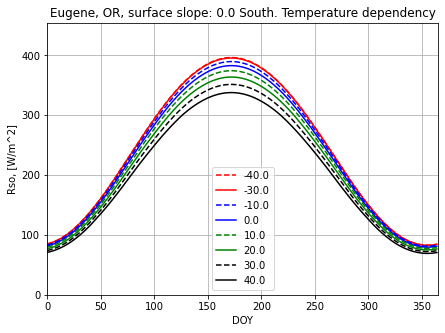

In [8]:
ymax = 450
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Temperature dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k')
labloc = ("upper left","lower center", "upper center")

#sns.set(font_scale=1.8)
fig1, ax1 = plt.subplots(figsize=(7, 5))

temperature_array = [-40.0, -30.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0]
i=0
for temperature in temperature_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity, '1-hour')
    #print(result[2])
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(temperature), colors[i],labloc[1])
    i+=1
plt.show()
# ymax = 120
# ymin = -10
# yname = 'NetLW, [W/m^2]'
# xname = 'DOY'
# i=0
# fig2, ax2 = plt.subplots(figsize=(7, 5))
# for temperature in temperature_array:
#     result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'3-hour','asce-ewri')
# #     print(result[4])
#     plot_results(result[0], result[4], fig2, ax2, ymax, xname, yname, plotname, str(temperature), colors[i],labloc[1],ymin) # 1h
# #     print(result[4])
#     i+=1
# plt.show()
# ymax = 120
# ymin = -10
# yname = 'NetLW, [W/m^2]'
# xname = 'DOY'
# i=0
# fig2, ax2 = plt.subplots(figsize=(7, 5))
# for temperature in temperature_array:
#     result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'instant','asce-ewri')
# #     print(result[4])
#     plot_results(result[0], result[4], fig2, ax2, ymax, xname, yname, plotname, str(temperature), colors[i],labloc[1],ymin) # 1h
# #     print(result[4])
#     i+=1
# plt.show()
# # #
# ymax = 120
# ymin = -10
# yname = 'NetLW, [W/m^2]'
# xname = 'DOY'
# i=0
# fig2, ax2 = plt.subplots(figsize=(7, 5))
# for temperature in temperature_array:
#     result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'24-hour','asce-ewri')
# #     print(result[4])
#     plot_results(result[0], result[4], fig2, ax2, ymax, xname, yname, plotname, str(temperature), colors[i],labloc[1],ymin) # 1h
# #     print(result[4])
#     i+=1
# plt.show()


### Slope dependency

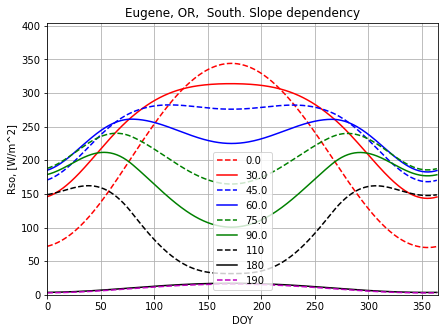

In [9]:
slope_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
ymax = 400
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, "+orient+ "Slope dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k', 'm--', 'm')
labloc = ("upper left","lower center", "upper center")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for slope in slope_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(slope), colors[i],labloc[1]) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

## Aspect dependency

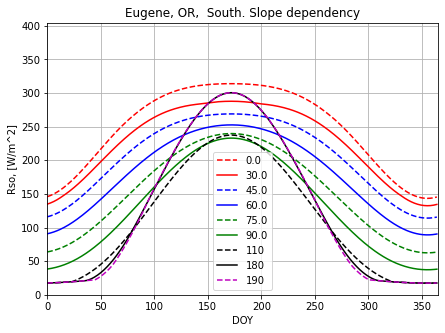

In [10]:
aspect_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0, 110, 180, 190]
slope = 30.0 # aspect is only affected when slope not zero ))
ymax = 400
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, "+orient+ "Slope dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k', 'm--', 'm')
labloc = ("upper left","lower center", "upper center")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for aspect in aspect_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect, elevation, albedo, turbidity, temperature, rhumidity,'24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(aspect), colors[i],labloc[1]) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

### Latitude dependency

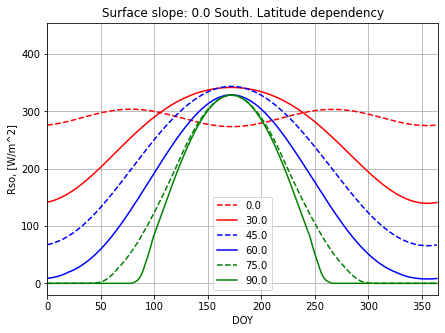

In [11]:
lat_array = [0.0, 30.0, 45.0, 60.0, 75.0, 90.0]
slope_deg = 0.0
aspect_deg = 60.0
ymax = 450
ymin = -20
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Surface slope: "+str(slope_deg)+orient+ "Latitude dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for lat in lat_array:
    result = runner.run_radiation(t_start,n,lat, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(lat), colors[i],labloc[1],ymin) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

### RHumidity dependency

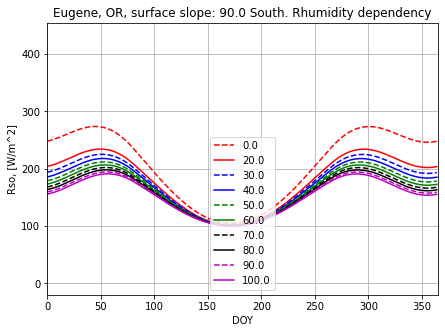

In [12]:
rhumidity_array = [0.0, 20.0, 30.0, 40.0,50.0, 60.0, 70.0,80.0, 90.0, 100.0]
slope_deg = 90.0
aspect_deg = 0.0
ymax = 450
ymin = -20
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Rhumidity dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center","lower left")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for rhum in rhumidity_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhum, '24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(rhum), colors[i],labloc[1],ymin) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

### Elevation dependency

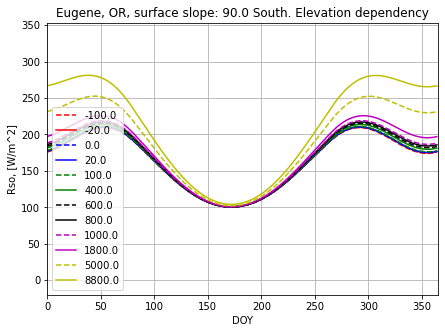

In [13]:
elevation_array = [-100.0, -20.0,0.0, 20.0, 100.0,400.0, 600.0, 800.0, 1000.0, 1800.0, 5000.0, 8800.0]
slope_deg = 90.0
ymax = 350
ymin = -20
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Elevation dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center","lower left")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for elev in elevation_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elev, albedo, turbidity, temperature, rhumidity, '24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(elev), colors[i],labloc[3],ymin) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

### Albedo dependency

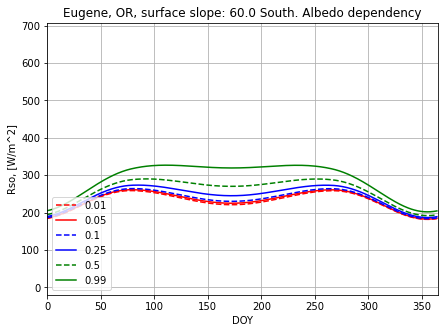

In [14]:
albedo_array = [0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
slope_deg = 60.0
ymax = 700
ymin = -20
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Albedo dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center","lower left")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for albedo in albedo_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity,'24-hour')
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(albedo), colors[i],labloc[3],ymin) # 1h
    i+=1
plt.show()


### Turbidity dependency

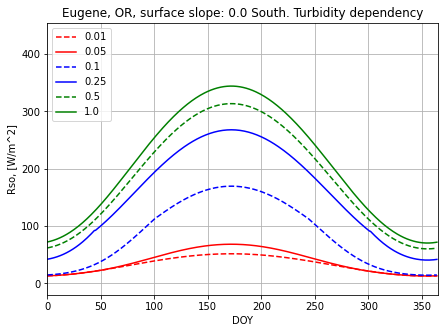

In [15]:
turbidity_array = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
slope_deg = 0.0
ymax = 450
ymin = -20
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Turbidity dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center","lower left")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for turbidity in turbidity_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity, '24-hour')
    # plot_results.plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, labels[0], colors[0])  # 1h
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, str(turbidity), colors[i],labloc[0],ymin) # 1h
    # colors = ('b--','b')
    # plot_results.plot_results(result[0],result[3],result[4], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 3h
    # colors = ('k--','k')
    # plot_results.plot_results(result[0],result[5],result[6], fig1, ax1, ymax, xname, yname, plotname, labels, colors[i]) # 24h
    i+=1
plt.show()

### Time-step verification of algorithm

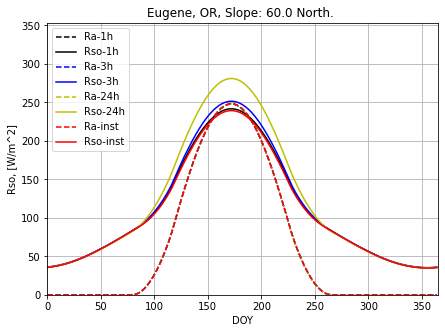

In [16]:
# slope_array = [0.0, 10.0, 30.0, 45.0, 60.0,75.0, 90.0]
slope_array = [60.0]
slope_deg = 60.0
aspect_deg = 180.0
orient=" South. "
if aspect_deg>=180:
    orient=" North. "
ymax = 350
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, "+"Slope: " + str(slope_deg) + orient
labels = ('Ra','Rso')

colors1 = ('r--','k--','b--', 'y--','g--')
colors = ('r','k','b','y','g')
labloc = ("upper left","lower center","upper left", "lower center", "upper center")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for slope in slope_array:
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect_deg, elevation, albedo, turbidity, temperature,rhumidity, '1-hour')
    plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, 'Ra-1h', colors1[1],labloc[2])
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'Rso-1h', colors[1],labloc[2])
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect_deg, elevation, albedo, turbidity, temperature,
                                         rhumidity, '3-hour')
    plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, 'Ra-3h', colors1[2],
                              labloc[2])
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'Rso-3h', colors[2],
                              labloc[2])
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect_deg, elevation, albedo, turbidity, temperature,
                                         rhumidity, '24-hour')
    plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, 'Ra-24h', colors1[3],
                              labloc[2])
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'Rso-24h', colors[3],
                              labloc[2])
    result = runner.run_radiation(t_start,n,latitude_deg, slope, aspect_deg, elevation, albedo, turbidity, temperature,
                                         rhumidity, 'instant')
    plot_results(result[0], result[1], fig1, ax1, ymax, xname, yname, plotname, 'Ra-inst', colors1[0],
                              labloc[2])
    plot_results(result[0], result[2], fig1, ax1, ymax, xname, yname, plotname, 'Rso-inst', colors[0],
                              labloc[2])
    i+=1
plt.show()

### Random inputs

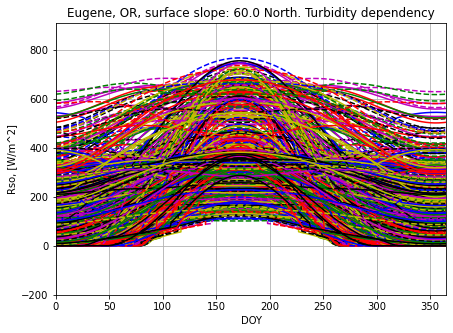

In [17]:
import random

number_of_trials = 1000


ymax = 900
ymin = -200
yname = 'Rso, [W/m^2]'
xname = 'DOY'
plotname = "Eugene, OR, surface slope: "+str(slope_deg)+orient+ "Turbidity dependency"
labels = ('Ra','Rso')
colors = ('r--','r', 'b--','b','g--','g','k--','k','m--','m','y--','y')
labloc = ("upper left","lower center", "upper center","lower left")

fig1, ax1 = plt.subplots(figsize=(7, 5))
i = 0
for c in range(1,number_of_trials):
    slope_deg = random.uniform(0.0,360.0)
    aspect_deg = random. uniform(0.0,360.0)
    latitude_deg = random.uniform(0.0,90.0)
    elevation = random.uniform(0.0,8800.0)
    rsm = random.uniform(0.0,1367.0)
    color_id = random.randint(0,11)
    result = runner.run_radiation(t_start,n,latitude_deg, slope_deg, aspect_deg, elevation, albedo, turbidity, temperature, rhumidity, '24-hour', )
    ax1.plot(result[0], result[2], colors[color_id])
    ax1.set_ylabel(yname)
    ax1.set_xlabel(xname)
    plt.title(plotname)
    plt.axis([0, 365, ymin, int(ymax*1.01)])
    plt.grid(True)
    i+=1
plt.show()